# QR
$$
A = QR
$$
A - симетричная положительно определенная матрица

Q - ортогональная матрица

R - верхне треугольная матрица

(QR разложение, в частности, использую для нахождения собственных значений матрици )

# Преобразование Хаусхолдера
$$
H = E - {{2} \over {v^Tv}}vv^t
$$

где v - произвольный вектор столбец, E - удиничная матрица, $vv^T$ - квадратная матрица того же размера

Такое преобразование позволет обратить в нуль группу поддиагональных элементов столюца матрицы

# Алгоритм разложения

Положим $A_0 = A$ и построим преобразование Хаусхолдера $H_1(A_1=H_1A_0 )$, переводящее
матрицу $A_0$ в матрицу $A_1$ с нулевыми элементами первого столбца под главной
диагональю:

$
\begin{equation*}
A_0 = \left(
\begin{array}{cccc}
a_{11}^0 & a_{12}^0 & \ldots & a_{1n}^0\\
a_{21}^0 & a_{22}^0 & \ldots & a_{2n}^0\\
\vdots & \vdots & \ddots & \vdots\\
a_{n1}^0 & a_{n2}^0 & \ldots & a_{nn}^0
\end{array}
\right)
\end{equation*}
$
$\xrightarrow[H_1]{}$
$
\begin{equation*}
A_1 = \left(
\begin{array}{cccc}
a_{11}^1 & a_{12}^1 & \ldots & a_{1n}^1\\
a_{21}^1 & a_{22}^1 & \ldots & a_{2n}^1\\
\vdots & \vdots & \ddots & \vdots\\
a_{n1}^1 & a_{n2}^1 & \ldots & a_{nn}^1
\end{array}
\right)
\end{equation*}
$

 

   Ясно, что матрица Хаусхолдера $H_1$ должна  определяться по первому столбцу
матрицы  $A_0$, т.е в качестве вектора $b$ в выражении берется вектор $(a_{11}^0, a_{12}^0,  \ldots,  a_{1n})^T$.
Тогда компоненты вектора вычисляются $v$ следующим образом: 
$$
    v_1^1 = a_{11}^0 + sign(a_{11}^0)(\sum_{j=1}^{n}{a_{j1}^0})^{{1}\over{2}}
$$
$$
v_i^1= a_{i1}^0, i=\overline{2,n}
$$

Матрица Хаусхолдера вычисляется согласно 
$$
H_1 = E - 2 {{v^1v^{1T}}\over{v^{1T}v^1}}
$$
  
На следующем, втором, шаге рассматриваемого процесса строится преобразование
Хаусхолдера $H_2(A_2=H_2A_1)$ , обнуляющее расположенные ниже главной диагонали
элементы второго столбца матрицы $A_1$. Взяв в качестве вектора $b$ вектор $(a_{11}^0, a_{12}^0,  \ldots,  a_{1n})^T$
размерности $n-1$, получим следующие выражения для компонентов
вектора $v$:
$$
v_1^2 = 0
$$
$$
v_1^2 = a_{22}^0 + sign(a_{22}^1)(\sum_{j=2}^{n}{a_{j2}^1})^{{1}\over{2}}
$$
$$
v_i^2= a_{i1}^1, i=\overline{3,n}
$$

Повторяя процесс $n-1$ раз, получим искомое разложение $A=QR$, где,
$Q = (H_{n-1}H_{n-2}\ldots H_0)^T =H_{n-1}H_{n-2}\ldots H_0, R = A_{n-1} $

# Распараллеливание

Матрица Хаусхолдера:
```
p = create_matrix(lines-i,lines-i, false);//Матрица Хайсолдера
for(k = 0; k < lines-i; k++){
    #pragma omp parallel for
    for(l = 0; l < lines-i; l++){
      if(k == l) p[k][k] = 1 - 2*vec[k]*vec[l];
      else p[k][l] = -2*vec[k]*vec[l];
    }
}
```
R:
```
float tm;
for(k = i; k < lines; k++){
    #pragma omp parallel for private(tm,m)
    for(l = i; l < lines; l++){
      tm = 0;
      for(m = i; m < lines; m++){
        tm += p[k-i][m-i]*matrixA[m][l];
      }
      mat[k][l] = tm;
    }
}
for(k = i; k < lines; k++){
    #pragma omp parallel for
    for(l = i; l < lines; l++){
      matrixA[k][l] = mat[k][l];
    }
}

```
Q:
```
for(k = 0; k < lines; k++){
    #pragma omp parallel for private(tm,m)
    for(l = i; l < lines; l++){
      tm = 0;
      for(m = i; m < lines; m++){
        tm += matrixQ[k][m]*p[m-i][l-i];
      }
      mat[k][l] = tm;
    }
}
for(k = 0; k < lines; k++){
    #pragma omp parallel for
    for(l = i; l < lines; l++){
      matrixQ[k][l] = mat[k][l];
    }
}
```

In [1]:
! bash ./run_omp.sh

matrix was sucesfuly loaded to memory.
Martix:
5.000000 4.000000 3.000000 2.000000 1.000000 
4.000000 5.000000 4.000000 3.000000 2.000000 
3.000000 4.000000 5.000000 4.000000 3.000000 
2.000000 3.000000 4.000000 5.000000 4.000000 
1.000000 2.000000 3.000000 4.000000 5.000000 

Solution is:
Matrix Q.
0.674200 0.682242 -0.203200 0.164565 0.107833 
0.539360 -0.298481 0.787401 0.000000 -0.000000 
0.404520 -0.341121 -0.406400 -0.744875 0.000000 
0.269680 -0.383761 -0.330201 0.502357 -0.646997 
0.134840 -0.426401 -0.254001 0.407083 0.754829 

Matrix R.
7.416199 8.090399 7.685879 6.472319 4.719398 
-0.000001 -2.132008 -3.667053 -4.519855 -4.605135 
-0.000000 -0.000000 -1.574802 -2.336803 -2.438404 
-0.000000 0.000000 -0.000000 1.489750 1.974785 
-0.000000 0.000000 -0.000000 0.000000 1.293993 
Time: 0.027889


In [2]:
test_simple ='./test_simple'
test_omp ='./test_omp'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [4]:
sizes_matrix = np.arange(5,1000, 50)
times_simple = []
times_omp = []

In [5]:
def read_time(name):
    times = []
    with open(name, 'r') as f:
        for line in f:
            times.append(float(line))
    return np.array(times)

In [6]:
times_simple = read_time(test_simple)
times_omp = read_time(test_omp)
times_omp_over_simple = times_simple/times_omp

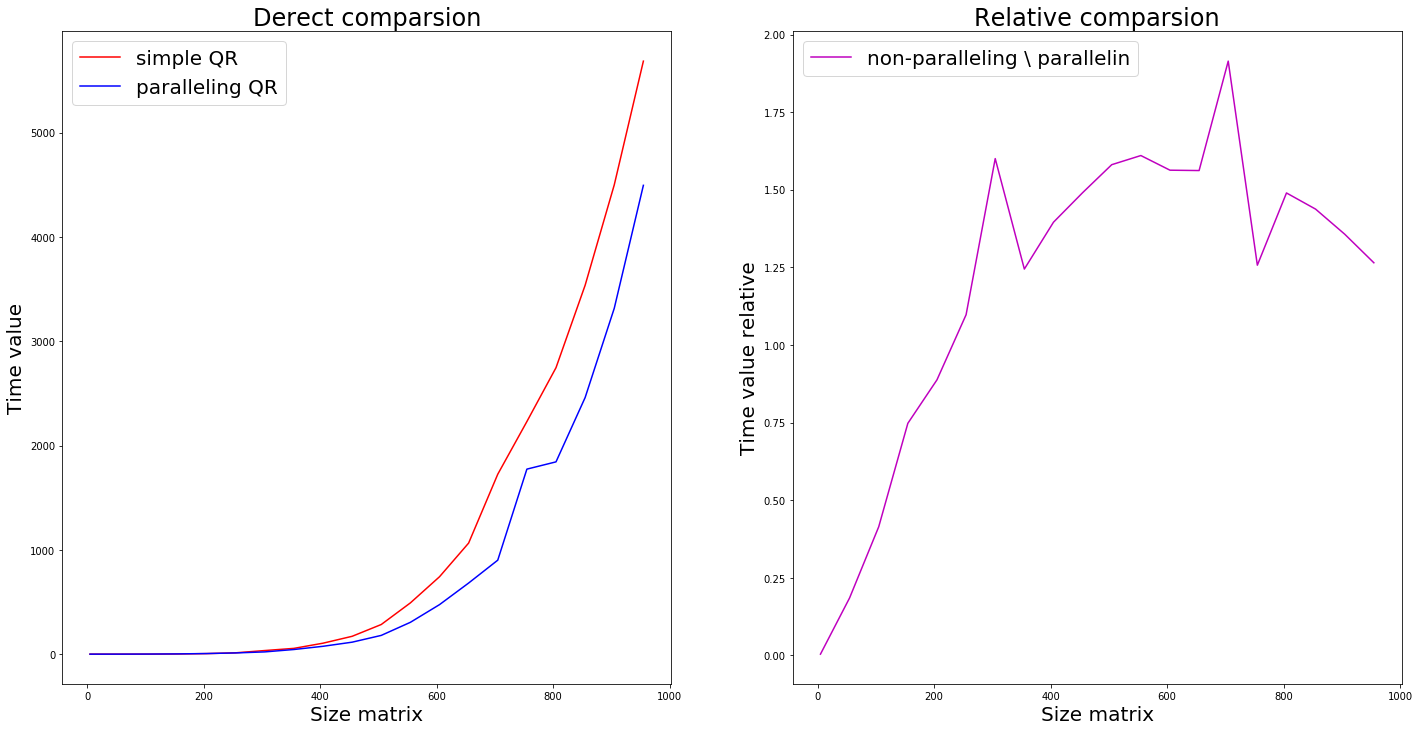

In [7]:
fig, axs = plt.subplots(nrows=1,ncols=2, figsize=(24,12))

axs[0].plot(sizes_matrix,times_simple,color='red',label='simple QR')
axs[0].plot(sizes_matrix,times_omp,color='blue', label='paralleling QR')
axs[0].set_title('Derect comparsion',size =24)
axs[0].set_xlabel('Size matrix',size =20)
axs[0].set_ylabel('Time value',size =20)
axs[0].legend(prop={'size': 20})
axs[1].plot(sizes_matrix,times_omp_over_simple,color='m',label='non-paralleling \ parallelin')
axs[1].set_title('Relative comparsion',size =24)
axs[1].set_xlabel('Size matrix',size =20)
axs[1].set_ylabel('Time value relative',size =20)
axs[1].legend(prop={'size': 20})

plt.show()